In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv(
    "../data/clean/cleaned_data_main.csv",
    parse_dates=[
        "order_purchase_timestamp",
        "order_approved_at",
        "order_delivered_timestamp",
        "order_estimated_delivery_date"
    ]
)

In [2]:
df_delivered = df[df["order_status"] == "delivered"].copy()

In [3]:
df_delivered

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,product_id,seller_id,price,...,payment_id,payment_sequential,payment_type,payment_installments,payment_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,Axfy13Hk4PIk,hCT0x9JiGXBQ,delivered,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09,90K0C1fIyQUf,ZWM05J9LcBSF,223.51,...,1,1,credit_card,1,259.14,toys,491.0,19.0,12.0,16.0
1,v6px92oS8cLG,PxA7fv9spyhx,delivered,2018-06-20 21:40:31,2018-06-20 22:20:20,2018-07-03 22:51:22,2018-07-24,qejhpMGGVcsl,IjlpYfhUbRQs,170.80,...,2,1,credit_card,8,382.39,watches_gifts,440.0,18.0,14.0,17.0
2,Ulpf9skrhjfm,g3nXeJkGI0Qw,delivered,2018-02-16 16:19:31,2018-02-17 16:15:35,2018-02-27 01:29:50,2018-03-08,qUS5d2pEAyxJ,77p2EYxcM9MD,64.40,...,3,1,credit_card,4,249.25,construction_tools_garden,2200.0,16.0,16.0,16.0
3,bwJVWupf2keN,EOEsCQ6QlpIg,delivered,2018-08-18 18:04:29,2018-08-18 18:15:16,2018-08-27 20:03:51,2018-09-19,639iGvMyv0De,jWzS0ayv9TGf,264.50,...,4,1,credit_card,2,27.79,toys,1450.0,68.0,3.0,48.0
4,Dd0QnrMk9Cj5,mVz5LO2Vd6cL,delivered,2017-12-22 16:44:04,2017-12-22 17:31:31,2018-01-05 19:22:49,2018-01-18,1lycYGcsic2F,l1pYW6GBnPMr,779.90,...,5,1,credit_card,1,76.15,toys,300.0,17.0,4.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89302,zlcLnXGgAabl,bfJtzkBGksdY,delivered,2018-08-19 17:25:36,2018-08-21 04:35:30,2018-08-30 14:47:46,2018-09-04,W8vikEizUggJ,2QjevWskirjm,31.99,...,89312,1,wallet,1,128.00,toys,700.0,21.0,14.0,14.0
89303,IlTAoIkILwrq,4hjsCpj6FC7g,delivered,2017-12-15 11:20:27,2017-12-16 02:37:32,2017-12-20 19:23:40,2018-01-04,KXSbyJWtMMwZ,BFS9XJPapWv0,282.00,...,89313,1,wallet,1,106.86,toys,600.0,16.0,16.0,16.0
89304,uA6oXfftGVmT,DLn56oKHl9bv,delivered,2018-07-24 06:39:14,2018-07-24 11:20:39,2018-07-27 01:41:40,2018-08-01,EG4wDSpFyTth,TuPm19CMKvrM,58.10,...,89314,1,credit_card,1,376.39,health_beauty,250.0,22.0,10.0,18.0
89305,v3QtU6xlGDJp,auSfRYUQUOIq,delivered,2018-08-11 08:04:22,2018-08-11 08:24:40,2018-08-14 21:43:51,2018-08-17,ZWyg4uNWPHjJ,yGbPyLPc8PmT,2899.00,...,89315,1,voucher,1,48.05,toys,250.0,16.0,2.0,11.0


In [4]:
df_delivered.isnull().sum()

order_id                          0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_approved_at                 0
order_delivered_timestamp         6
order_estimated_delivery_date     0
product_id                        0
seller_id                         0
price                             0
shipping_charges                  0
customer_zip_code_prefix          0
customer_city                     0
customer_state                    0
payment_id                        0
payment_sequential                0
payment_type                      0
payment_installments              0
payment_value                     0
product_category_name             0
product_weight_g                 21
product_length_cm                15
product_height_cm                15
product_width_cm                 15
dtype: int64

In [5]:
# H4: Some product categories have higher logistics cost ratios

In [6]:
#we wanna show logistics cost ratio is different across product categories.
#creating a data frame for logistics_cost_ratio
df_delivered = df_delivered[df_delivered["price"] > 0].copy() #to make sure we don't have any 0 value that crashes our code
df_delivered["logistics_cost_ratio"] = df_delivered["shipping_charges"] / df_delivered["price"]

In [7]:
#creating a subset for H4
df_h4 = df_delivered[["product_category_name", "logistics_cost_ratio"]].copy()

In [8]:
#quick check:
print(df_h4.shape)
print(df_h4.dtypes)
df_h4.head()

(87419, 2)
product_category_name     object
logistics_cost_ratio     float64
dtype: object


,product_category_name,logistics_cost_ratio
0,toys,0.378730
1,watches_gifts,0.139286
2,construction_tools_garden,0.269876
3,toys,0.116144
4,toys,0.039313


In [9]:
#descriptive statistics per product category
product_category_statistics = (
    df_h4
    .groupby("product_category_name")["logistics_cost_ratio"]
    .agg(["mean", "median", "std", "count", "min", "max"])
    .sort_values("mean", ascending=False)
)

product_category_statistics.head(10)

#this shows top 10 categories with highest mean ratio

,mean,median,std,count,min,max
product_category_name,,,,,,
diapers_and_hygiene,5.865364,5.865364,NaN,1,5.865364,5.865364
music,1.851740,0.373770,2.861509,7,0.004486,7.835616
agro_industry_and_commerce,1.766952,1.251684,2.512801,65,0.004141,14.475959
flowers,1.754538,1.812640,0.916491,6,0.504397,2.612485
air_conditioning,1.733140,0.384923,7.518701,76,0.009939,65.341176
fashion_female_clothing,1.614642,1.614642,0.797815,2,1.050501,2.178782
kitchen_dining_laundry_garden_furniture,1.513618,0.269849,3.426169,52,0.004632,14.581132
construction_tools_tools,1.426929,0.620782,2.718202,32,0.007209,11.944027
home_construction,1.276999,0.433731,2.760625,130,0.001152,14.926023


In [10]:
#Filtering categories with count >= 30
valid_categories = product_category_statistics[product_category_statistics["count"] >= 30]

valid_categories.head()

,mean,median,std,count,min,max
product_category_name,,,,,,
agro_industry_and_commerce,1.766952,1.251684,2.512801,65,0.004141,14.475959
air_conditioning,1.733140,0.384923,7.518701,76,0.009939,65.341176
kitchen_dining_laundry_garden_furniture,1.513618,0.269849,3.426169,52,0.004632,14.581132
construction_tools_tools,1.426929,0.620782,2.718202,32,0.007209,11.944027
home_construction,1.276999,0.433731,2.760625,130,0.001152,14.926023


In [11]:
valid_categories.shape

(45, 6)

In [12]:
valid_categories

,mean,median,std,count,min,max
product_category_name,,,,,,
agro_industry_and_commerce,1.766952,1.251684,2.512801,65,0.004141,14.475959
air_conditioning,1.733140,0.384923,7.518701,76,0.009939,65.341176
kitchen_dining_laundry_garden_furniture,1.513618,0.269849,3.426169,52,0.004632,14.581132
construction_tools_tools,1.426929,0.620782,2.718202,32,0.007209,11.944027
home_construction,1.276999,0.433731,2.760625,130,0.001152,14.926023
furniture_decor,1.263461,0.175857,10.098010,1723,0.000491,177.411765
market_place,1.260835,0.211229,1.992099,79,0.004151,9.603346
watches_gifts,1.199835,0.221800,4.816119,1177,0.000000,55.941176
bed_bath_table,1.181036,0.230469,6.278107,2119,0.000124,96.611765


In [13]:
#filtering the main dataset
df_h4_filtered = df_h4[df_h4["product_category_name"].isin(valid_categories.index)].copy()
df_h4_filtered.shape

(87243, 2)

In [14]:
#quick check
df_h4_filtered["product_category_name"].nunique()

45

In [15]:
sorted(df_h4_filtered["product_category_name"].unique())

['agro_industry_and_commerce',
 'air_conditioning',
 'audio',
 'auto',
 'baby',
 'bed_bath_table',
 'books_general_interest',
 'books_technical',
 'computers',
 'computers_accessories',
 'consoles_games',
 'construction_tools_construction',
 'construction_tools_garden',
 'construction_tools_lights',
 'construction_tools_tools',
 'cool_stuff',
 'electronics',
 'fashion_bags_accessories',
 'fashion_shoes',
 'fixed_telephony',
 'food_and_drinks',
 'furniture_decor',
 'furniture_living_room',
 'garden_tools',
 'health_beauty',
 'home_appliances',
 'home_comfort',
 'home_construction',
 'housewares',
 'industry_commerce_and_business',
 'kitchen_dining_laundry_garden_furniture',
 'luggage_accessories',
 'market_place',
 'musical_instruments',
 'office_furniture',
 'perfumery',
 'pet_shop',
 'signaling_and_security',
 'sports_leisure',
 'stationery',
 'tablets_printing_image',
 'telephony',
 'toys',
 'unknown',
 'watches_gifts']

In [16]:
df_h4_filtered["product_category_name"].value_counts()

product_category_name
toys                                       65636
health_beauty                               2289
bed_bath_table                              2119
sports_leisure                              1799
furniture_decor                             1723
computers_accessories                       1673
housewares                                  1301
watches_gifts                               1177
telephony                                    891
auto                                         813
garden_tools                                 777
cool_stuff                                   703
perfumery                                    650
baby                                         599
electronics                                  538
office_furniture                             528
stationery                                   456
home_appliances                              401
fashion_bags_accessories                     396
pet_shop                                     38

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# Bar Plotting Top 10 Categories by Average Logistics Cost Ratio

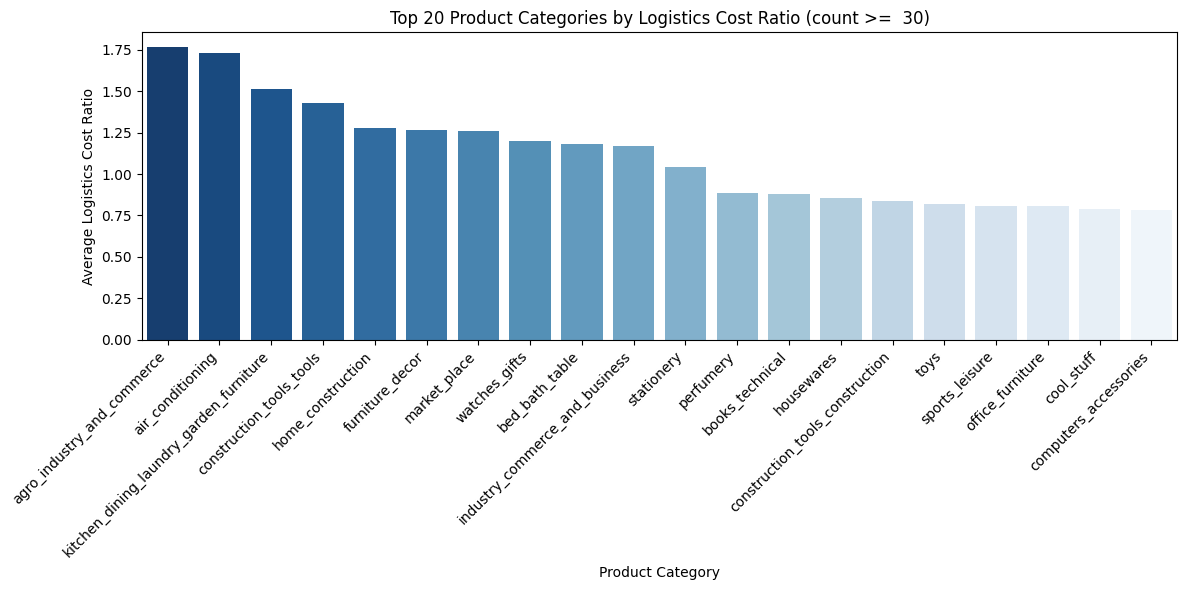

In [19]:
top_20_categories = valid_categories.sort_values("mean", ascending=False).head(20).reset_index()

plt.figure(figsize=(12, 6))
palette = sns.color_palette("Blues", n_colors=len(top_20_categories))[::-1]
sns.barplot(
    data=top_20_categories,
    x="product_category_name",
    y="mean",
    palette=palette,
    hue="product_category_name",   
    legend=False                   
)

plt.xticks(rotation=45, ha="right")
plt.ylabel("Average Logistics Cost Ratio")
plt.xlabel("Product Category")
plt.title("Top 20 Product Categories by Logistics Cost Ratio (count >=  30)")
plt.tight_layout()
plt.savefig("../figures/Logistics_cost_product.png", dpi=300, bbox_inches="tight")
plt.show()

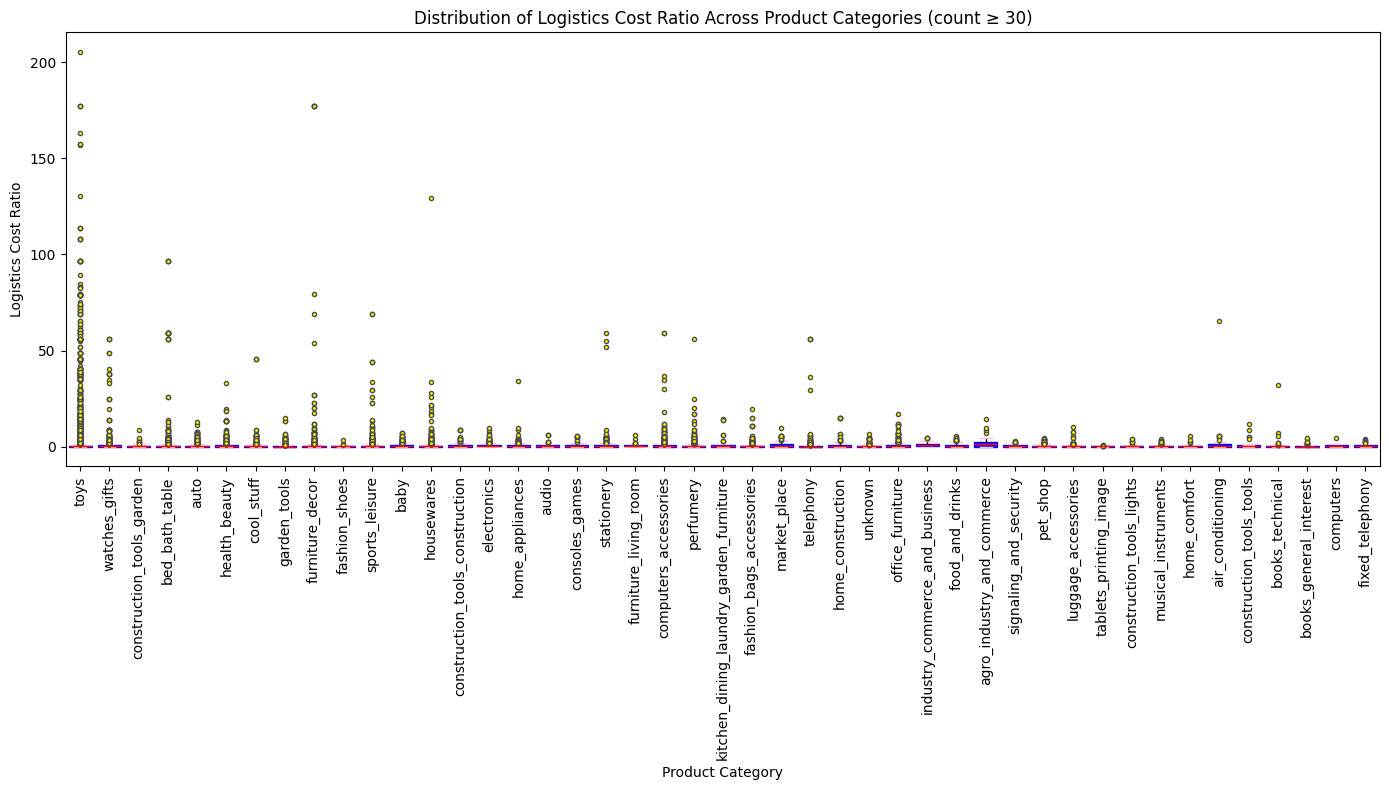

In [20]:
#Distribution of Logistics Cost Ratio Across Product Categories
plt.figure(figsize=(14, 8)) #creates new plot and defines the figure size
sns.boxplot(
    data=df_h4_filtered,
    x="product_category_name",
    y="logistics_cost_ratio",
    color="blue",
    medianprops={"color": "red", "linewidth": 1},
    whiskerprops={"color": "black"},
    capprops={"color": "pink"},
    boxprops={"edgecolor": "blue"},
    flierprops={"marker":"o", "markersize":3, "markerfacecolor":"yellow"}
)
plt.xticks(rotation=90)
plt.ylabel("Logistics Cost Ratio")
plt.xlabel("Product Category")
plt.title("Distribution of Logistics Cost Ratio Across Product Categories (count ≥ 30)")
plt.tight_layout()
plt.savefig("../figures/Distribution_Logistics_cost_product.png", dpi=300, bbox_inches="tight")
plt.show()

In [21]:
# H4: Product category strongly influences total revenue

In [22]:
# in this analysis we make revenue = price

In [23]:
#total revenue per product category
category_revenue = (
    df_delivered.groupby("product_category_name")["price"]
    .sum()
    .sort_values(ascending=False)
)

category_revenue.head(45) #top categories with higehest revenue.

product_category_name
toys                                       22611885.65
furniture_decor                              739082.57
garden_tools                                 732447.16
bed_bath_table                               594526.86
health_beauty                                581728.49
watches_gifts                                577406.42
sports_leisure                               530014.03
telephony                                    491089.47
computers_accessories                        423136.32
housewares                                   406031.19
auto                                         228457.84
cool_stuff                                   180427.61
baby                                         176951.96
office_furniture                             159651.40
perfumery                                    157954.44
stationery                                   153135.34
fashion_bags_accessories                     139643.16
pet_shop                                   

In [24]:
#we run this again because it helps to confirm if some categories produce higher revenue per order.
category_avg_revenue = (
    df_delivered.groupby("product_category_name")["price"]
    .mean()
    .sort_values(ascending=False)
)

category_avg_revenue.head(45)

product_category_name
la_cuisine                         1320.322500
garden_tools                        942.660438
telephony                           551.166633
arts_and_craftmanship               504.360000
watches_gifts                       490.574698
construction_tools_lights           465.039608
fashion_underwear_beach             455.834667
furniture_decor                     428.950998
home_comfort                        386.519268
luggage_accessories                 369.821638
fashion_shoes                       355.718500
construction_tools_construction     355.568698
musical_instruments                 352.669041
fashion_bags_accessories            352.634242
toys                                344.504322
stationery                          335.823114
agro_industry_and_commerce          335.592308
books_general_interest              331.392564
furniture_bedroom                   321.125000
fashion_childrens_clothes           319.290000
housewares                          31

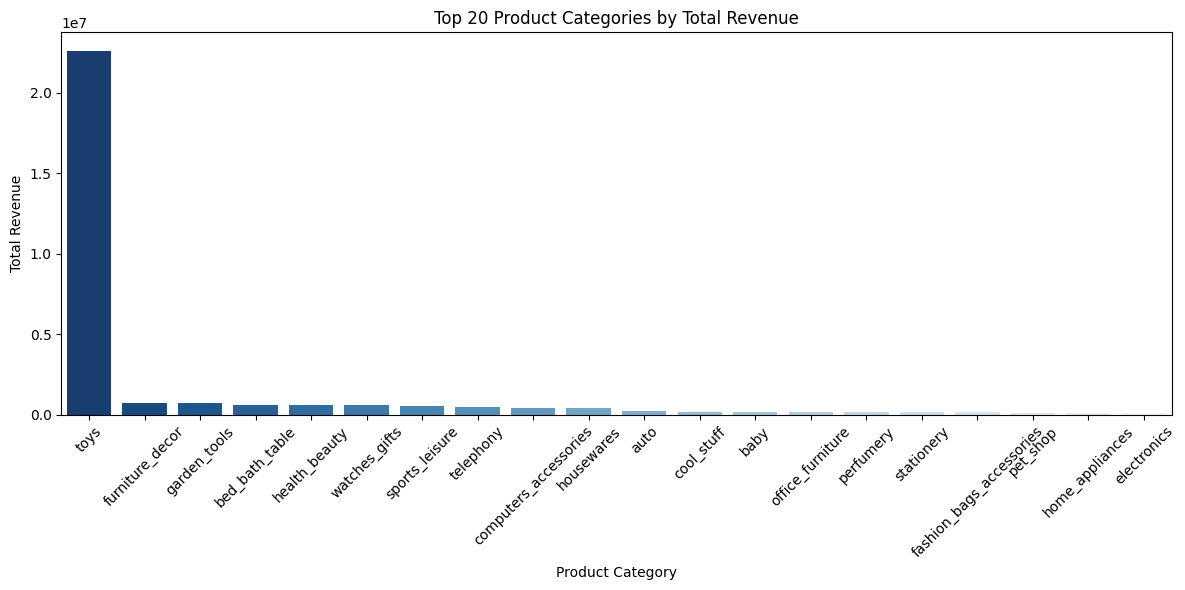

In [25]:
#visualizing total revenue dieffernces
top10_revenue = category_revenue.head(20).reset_index()

plt.figure(figsize=(12, 6))
palette = sns.color_palette("Blues", n_colors=len(top_20_categories))[::-1]
sns.barplot(
    data=top10_revenue,
    x="product_category_name",
    y="price",
    hue="product_category_name",
    palette=palette,
    legend=False
)
plt.xticks(rotation=45)
plt.ylabel("Total Revenue")
plt.xlabel("Product Category")
plt.title("Top 20 Product Categories by Total Revenue")
plt.tight_layout()
plt.savefig("../figures/Total_revenue_category.png", dpi=300, bbox_inches="tight")
plt.show()

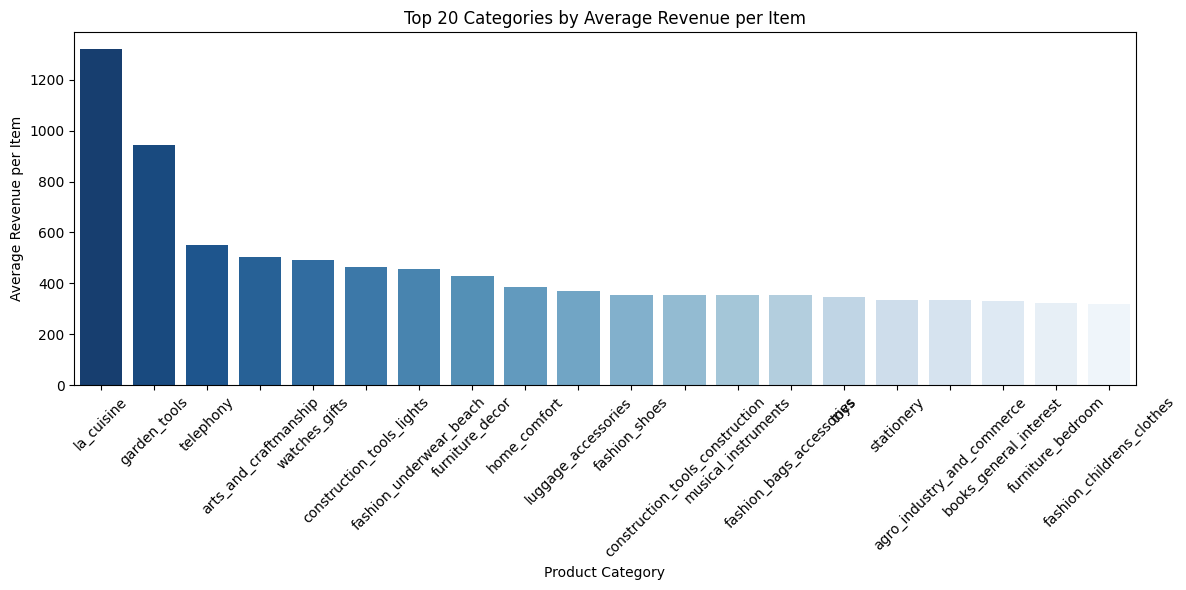

In [26]:
# Visualizing average revenue per category
top10_avg = category_avg_revenue.head(20).reset_index()

plt.figure(figsize=(12, 6))
palette = sns.color_palette("Blues", n_colors=len(top_20_categories))[::-1]
sns.barplot(
    data=top10_avg,
    x="product_category_name",
    y="price",
    palette=palette,
    hue="product_category_name",
    legend=False
)
plt.xticks(rotation=45)
plt.ylabel("Average Revenue per Item")
plt.xlabel("Product Category")
plt.title("Top 20 Categories by Average Revenue per Item")
plt.tight_layout()
plt.savefig("../figures/Avg_Revenue_per_Item.png", dpi=300, bbox_inches="tight")
plt.show()